### 컨볼루션 층 테스트

In [7]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.layers import Convolution

image = np.arange(16).reshape(1,1,4,4)
print(image.shape)
print(image)

W = np.ones((1,1,2,2))
print(W)
b = np.full((1,), 3)
print(b.shape)
print(b)
conv = Convolution(W, b)
out = conv.forward(image)
print(out.shape)
print(out)

(1, 1, 4, 4)
[[[[ 0  1  2  3]
   [ 4  5  6  7]
   [ 8  9 10 11]
   [12 13 14 15]]]]
[[[[1. 1.]
   [1. 1.]]]]
(1,)
[3]
(1, 1, 3, 3)
[[[[13. 17. 21.]
   [29. 33. 37.]
   [45. 49. 53.]]]]


### 다차원 배열의 연산

In [8]:
import numpy as np
a = np.arange(12).reshape(2,2,3)
print(a.shape)
print(a)

(2, 2, 3)
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


In [9]:
a = np.arange(12).reshape(2,2,3)
b = a.transpose(2, 1, 0)
print(b.shape)
print(b)

(3, 2, 2)
[[[ 0  6]
  [ 3  9]]

 [[ 1  7]
  [ 4 10]]

 [[ 2  8]
  [ 5 11]]]


In [10]:
a = np.arange(12).reshape(2,2,3)
b = a.transpose(1, 0, 2)
print(b.shape) # (2,2,3)
print(b)

(2, 2, 3)
[[[ 0  1  2]
  [ 6  7  8]]

 [[ 3  4  5]
  [ 9 10 11]]]


In [11]:
a = np.arange(12).reshape(2,2,3)
b = a.transpose(0, 2, 1)
print(b.shape) # (2,3,2)
print(b)

(2, 3, 2)
[[[ 0  3]
  [ 1  4]
  [ 2  5]]

 [[ 6  9]
  [ 7 10]
  [ 8 11]]]


In [12]:
a = np.arange(12).reshape(2,2,3)
b = a.transpose(2, 0, 1)
print(b.shape) 
print(b)

(3, 2, 2)
[[[ 0  3]
  [ 6  9]]

 [[ 1  4]
  [ 7 10]]

 [[ 2  5]
  [ 8 11]]]


### im2col 함수 테스트

In [22]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.util import im2col

# x1 = np.arange(9).reshape(1, 1, 3, 3)
# col1 = im2col(x1, 2, 2)
# print(col1.shape)
# print(col1)

# x2 = np.arange(18).reshape(1, 2, 3, 3)
# col2 = im2col(x2, 2, 2)
# print(col2.shape)
# print(col2)

x3 = np.arange(36).reshape(2, 2, 3, 3)
col3 = im2col(x3, 2, 2)
print(col3.shape)
print(col3)

(8, 8)
[[ 0.  1.  3.  4.  9. 10. 12. 13.]
 [ 1.  2.  4.  5. 10. 11. 13. 14.]
 [ 3.  4.  6.  7. 12. 13. 15. 16.]
 [ 4.  5.  7.  8. 13. 14. 16. 17.]
 [18. 19. 21. 22. 27. 28. 30. 31.]
 [19. 20. 22. 23. 28. 29. 31. 32.]
 [21. 22. 24. 25. 30. 31. 33. 34.]
 [22. 23. 25. 26. 31. 32. 34. 35.]]


### np.pad() 의 동작

In [9]:
import numpy as np
pad=0
input_data = np.arange(9).reshape((1,1,3,3))
print(input_data)
img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
print(img)

[[[[0 1 2]
   [3 4 5]
   [6 7 8]]]]
[[[[0 1 2]
   [3 4 5]
   [6 7 8]]]]


### 파이썬의 슬라이스 문법

In [10]:
a = np.array([1,2,3])
print(a[0])
print(a[0:1])

1
[1]


In [11]:
a = np.array([[1,2],[3,4]])
print(a[0])   # [1 2]
print(a[0:1]) # [[1 2]]

[1 2]
[[1 2]]


In [29]:
a = np.arange(9).reshape(1,1,3,3)
print(a.shape)  # (1, 1, 3, 3)
a = a[:, :, 0:2:1, 0:2:1]
print(a.shape) #  (1, 1, 2, 2)

(1, 1, 3, 3)
(1, 1, 2, 2)


In [32]:
a = np.zeros(16).reshape(1,1,2,2,2,2)
print(a.shape)  # (1, 1, 2, 2, 2, 2)
a = a[:, :, 0, 0, :, :]
print(a.shape)

(1, 1, 2, 2, 2, 2)
(1, 1, 2, 2)


In [33]:
image = np.arange(9).reshape(1,1,3,3)
col = np.zeros(16).reshape(1,1,2,2,2,2)

col[:, :, 0, 0, :, :] = image[:, :, 0:2:1, 0:2:1]
print(col) 

[[[[[[0. 1.]
     [3. 4.]]

    [[0. 0.]
     [0. 0.]]]


   [[[0. 0.]
     [0. 0.]]

    [[0. 0.]
     [0. 0.]]]]]]


### input 채널이 1개인 경우

In [29]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
pad=0
input_data = np.array([[[[0,1,2],
                         [3,4,5],
                         [6,7,8]]]])
img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
col = np.zeros((1, 1, 2, 2, 2, 2))

# print(img.shape)
# print(img)
# print(col.shape)
# print(img[:, :, 0:2:1, 0:2:1])
# print(img[:, :, 0:2:1, 0:2:1].shape)
# print(col[:, :, 0, 0, :, :].shape)
col[:, :, 0, 0, :, :] = img[:, :, 0:2:1, 0:2:1]
col[:, :, 0, 1, :, :] = img[:, :, 0:2:1, 1:3:1]
col[:, :, 1, 0, :, :] = img[:, :, 1:3:1, 0:2:1]
col[:, :, 1, 1, :, :] = img[:, :, 1:3:1, 1:3:1]

# print(col)
ret = col.transpose(0, 4, 5, 1, 2, 3)
# print(ret.shape)
# print(ret)
col = ret.reshape( 1*2*2, -1 )
print(col.shape)
print(col)

W = np.ones((1,1,2,2))
print(W)
col_W = W.reshape(1, -1).T
print(col_W.shape)
b = np.full((1,),3)
out = np.dot(col, col_W) + b
out = out.reshape(1, 2, 2, -1).transpose(0, 3, 1, 2)
print( out )

(4, 4)
[[0. 1. 3. 4.]
 [1. 2. 4. 5.]
 [3. 4. 6. 7.]
 [4. 5. 7. 8.]]
[[[[1. 1.]
   [1. 1.]]]]
(4, 1)
[[[[11. 15.]
   [23. 27.]]]]


### input 채널이 2개인 경우

In [40]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
pad=0
input_data = np.arange(18).reshape((1,2,3,3))
img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
col = np.zeros((1, 2, 2, 2, 2, 2))

# print(img.shape)
# print(img)
# print(col.shape)
# print(img[:, :, 0:2:1, 0:2:1].shape)  # (1, 2, 2, 2)
# print(col[:, :, 0, 0, :, :].shape)
col[:, :, 0, 0, :, :] = img[:, :, 0:2:1, 0:2:1]
col[:, :, 0, 1, :, :] = img[:, :, 0:2:1, 1:3:1]
col[:, :, 1, 0, :, :] = img[:, :, 1:3:1, 0:2:1]
col[:, :, 1, 1, :, :] = img[:, :, 1:3:1, 1:3:1]

# print(col)
ret = col.transpose(0, 4, 5, 1, 2, 3)
# # print(ret.shape)
# # print(ret)
col = ret.reshape( 1*2*2, -1 )
print(col.shape)
print(col)

W = np.ones((1,2,2,2))
# print(W)
col_W = W.reshape(1, -1).T
print(col_W.shape)
b = np.full((1,),3)
out = np.dot(col, col_W) + b
out = out.reshape(1, 2, 2, -1).transpose(0, 3, 1, 2)
print( out )

(4, 8)
[[ 0.  1.  3.  4.  9. 10. 12. 13.]
 [ 1.  2.  4.  5. 10. 11. 13. 14.]
 [ 3.  4.  6.  7. 12. 13. 15. 16.]
 [ 4.  5.  7.  8. 13. 14. 16. 17.]]
(8, 1)
[[[[55. 63.]
   [79. 87.]]]]


### input 그림이 1개, 채널이 2개, 필터가 3개인 경우

In [46]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
pad=0
input_data = np.arange(18).reshape((1,2,3,3))
img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
col = np.zeros((1, 2, 2, 2, 2, 2))

# print(img.shape)
# print(img)
# print(col.shape)
# print(img[:, :, 0:2:1, 0:2:1].shape)  # (1, 2, 2, 2)
# print(col[:, :, 0, 0, :, :].shape)
col[:, :, 0, 0, :, :] = img[:, :, 0:2:1, 0:2:1]
col[:, :, 0, 1, :, :] = img[:, :, 0:2:1, 1:3:1]
col[:, :, 1, 0, :, :] = img[:, :, 1:3:1, 0:2:1]
col[:, :, 1, 1, :, :] = img[:, :, 1:3:1, 1:3:1]

# print(col)
ret = col.transpose(0, 4, 5, 1, 2, 3)
# # print(ret.shape)
# # print(ret)
col = ret.reshape( 1*2*2, -1 )
print(col.shape)
# print(col)

W = np.ones((3,2,2,2))
# print(W)
col_W = W.reshape(3, -1).T
print(col_W.shape)
b = np.full((1,),3)
out = np.dot(col, col_W) + b
print(out.shape)
out = out.reshape(1, 2, 2, -1).transpose(0, 3, 1, 2)
print( out.shape )
print(out)

(4, 8)
(8, 3)
(4, 3)
(1, 3, 2, 2)
[[[[55. 63.]
   [79. 87.]]

  [[55. 63.]
   [79. 87.]]

  [[55. 63.]
   [79. 87.]]]]


### input 그림이 2개, 채널이 2개, 필터가 3개인 경우

In [32]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
pad=0
input_data = np.arange(36).reshape((2,2,3,3))
img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
col = np.zeros((2, 2, 2, 2, 2, 2))

# print(img.shape)
# print(img)
# print(col.shape)
# print(img[:, :, 0:2:1, 0:2:1])
# print(col)
col[:, :, 0, 0, :, :] = img[:, :, 0:2:1, 0:2:1]
col[:, :, 0, 1, :, :] = img[:, :, 0:2:1, 1:3:1]
col[:, :, 1, 0, :, :] = img[:, :, 1:3:1, 0:2:1]
col[:, :, 1, 1, :, :] = img[:, :, 1:3:1, 1:3:1]

# print(col)
ret = col.transpose(0, 4, 5, 1, 2, 3)
# print(ret.shape)
# print(ret)
ret1 = ret.reshape( 2*2*2, -1 )
# # print(ret1.shape)
print(ret1)

W = np.ones((3,2,2,2))
# # # print(W)
W = W.reshape(3,-1).T
# # # print(W)
out_temp = np.dot(ret1, W) 
out = out_temp.reshape(2, 2, 2, -1).transpose(0, 3, 1, 2)
print(out.shape)

[[ 0.  1.  3.  4.  9. 10. 12. 13.]
 [ 1.  2.  4.  5. 10. 11. 13. 14.]
 [ 3.  4.  6.  7. 12. 13. 15. 16.]
 [ 4.  5.  7.  8. 13. 14. 16. 17.]
 [18. 19. 21. 22. 27. 28. 30. 31.]
 [19. 20. 22. 23. 28. 29. 31. 32.]
 [21. 22. 24. 25. 30. 31. 33. 34.]
 [22. 23. 25. 26. 31. 32. 34. 35.]]
(2, 3, 2, 2)


###  합성곱 연산의 정확한 고찰

In [31]:
import sys, os
sys.path.append(os.pardir)
import numpy as np

filter_h=2
filter_w=2
out_h=3
out_w=3
input_data = np.arange(16).reshape((1,1,4,4))
print(input_data.shape)
# col = np.zeros((1, 1, filter_h, filter_w, out_h, out_w))
col = np.zeros((1, 1, out_h, out_w, filter_h, filter_w ))
print(col.shape)

for y in range(out_h):
    y_max = y + filter_h
    for x in range(out_w):
        x_max = x + filter_w
        col[:, :, y, x, :, :] = input_data[:, :, y:y_max, x:x_max]

# for y in range(filter_h):
#     y_max = y + out_h
#     for x in range(filter_w):
#         x_max = x + out_w
#         col[:, :, y, x, :, :] = input_data[:, :, y:y_max, x:x_max]


print(col)
# ret = col.transpose(0, 4, 5, 1, 2, 3)
# ret1 = ret.reshape( 3*3, -1 )
# print(ret1)

(1, 1, 4, 4)
(1, 1, 3, 3, 2, 2)
[[[[[[ 0.  1.]
     [ 4.  5.]]

    [[ 1.  2.]
     [ 5.  6.]]

    [[ 2.  3.]
     [ 6.  7.]]]


   [[[ 4.  5.]
     [ 8.  9.]]

    [[ 5.  6.]
     [ 9. 10.]]

    [[ 6.  7.]
     [10. 11.]]]


   [[[ 8.  9.]
     [12. 13.]]

    [[ 9. 10.]
     [13. 14.]]

    [[10. 11.]
     [14. 15.]]]]]]


In [42]:
def my_col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

In [43]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.util import im2col

input_data = np.arange(16).reshape((1,1,4,4))
print(input_data)
col = im2col(input_data, 2, 2)
print(col.shape)
print(col)
image = my_col2im(col, input_data.shape, 2, 2)
print(image)

[[[[ 0  1  2  3]
   [ 4  5  6  7]
   [ 8  9 10 11]
   [12 13 14 15]]]]
(9, 4)
[[ 0.  1.  4.  5.]
 [ 1.  2.  5.  6.]
 [ 2.  3.  6.  7.]
 [ 4.  5.  8.  9.]
 [ 5.  6.  9. 10.]
 [ 6.  7. 10. 11.]
 [ 8.  9. 12. 13.]
 [ 9. 10. 13. 14.]
 [10. 11. 14. 15.]]
[[[[ 0.  2.  4.  3.]
   [ 8. 20. 24. 14.]
   [16. 36. 40. 22.]
   [12. 26. 28. 15.]]]]


In [56]:
import sys, os
sys.path.append(os.pardir)
import numpy as np

filter_h=2
filter_w=2
out_h=3
out_w=3
input_data = np.arange(16).reshape((1,1,4,4))
print(input_data.shape)
col = np.zeros((1, 1,filter_h, filter_w,out_h, out_w ))
print(col.shape)

for y in range(filter_h):
    y_max = y + out_h
    for x in range(filter_w):
        x_max = x + out_w
        col[:, :, y, x, :, :] = input_data[:, :, y:y_max, x:x_max]
#           1  1  3 3                      1  1   3        3

print(col)
col = col.transpose(0, 4, 5, 1, 2, 3)
print(col)

(1, 1, 4, 4)
(1, 1, 2, 2, 3, 3)
[[[[[[ 0.  1.  2.]
     [ 4.  5.  6.]
     [ 8.  9. 10.]]

    [[ 1.  2.  3.]
     [ 5.  6.  7.]
     [ 9. 10. 11.]]]


   [[[ 4.  5.  6.]
     [ 8.  9. 10.]
     [12. 13. 14.]]

    [[ 5.  6.  7.]
     [ 9. 10. 11.]
     [13. 14. 15.]]]]]]
[[[[[[ 0.  1.]
     [ 4.  5.]]]


   [[[ 1.  2.]
     [ 5.  6.]]]


   [[[ 2.  3.]
     [ 6.  7.]]]]



  [[[[ 4.  5.]
     [ 8.  9.]]]


   [[[ 5.  6.]
     [ 9. 10.]]]


   [[[ 6.  7.]
     [10. 11.]]]]



  [[[[ 8.  9.]
     [12. 13.]]]


   [[[ 9. 10.]
     [13. 14.]]]


   [[[10. 11.]
     [14. 15.]]]]]]


In [65]:
import numpy as np
def my_im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col
            
# input_data = np.arange(9).reshape((1,1,3,3))  
# input_data = np.arange(18).reshape((2,1,3,3))            
# input_data = np.arange(18).reshape((1,2,3,3))            
# input_data = np.arange(54).reshape((2,3,3,3))    
input_data = np.random.randn(1,3,448,640)
my_col = my_im2col(input_data, 5, 5)            
print(my_col.shape)   # (282384, 75)         

(282384, 75)


###  Convolution test

In [62]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *

w = np.ones((1,1,2,2))
# print(w)
b = np.full((1,), 3)
# print(b)
conv = Convolution(w, b)

x = np.arange(9).reshape((1,1,3,3))
out = conv.forward(x)
print(out)

[[[[11. 15.]
   [23. 27.]]]]


In [63]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *

w = np.ones((1,1,2,2))
# print(w)
b = np.full((1,), 3)
# print(b)
conv = Convolution(w, b)

x = np.arange(16).reshape((1,1,4,4))
out = conv.forward(x)
print(out)

[[[[13. 17. 21.]
   [29. 33. 37.]
   [45. 49. 53.]]]]


In [64]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *

w = np.ones((1,1,2,2))
# print(w)
b = np.full((1,), 3)
# print(b)
conv = Convolution(w, b, pad=1)

x = np.arange(9).reshape((1,1,3,3))
out = conv.forward(x)
print(out)

[[[[ 3.  4.  6.  5.]
   [ 6. 11. 15. 10.]
   [12. 23. 27. 16.]
   [ 9. 16. 18. 11.]]]]


In [73]:
def my_col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)
#     print(col)
#     print(col.shape)
    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

In [74]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.util import im2col, col2im

x1 = np.arange(16).reshape((1,1,4,4))
col = im2col(x1, 2, 2)
print(x1)
# print(col)

x2 = my_col2im(col,x1.shape, 2, 2)
print(x2)

[[[[ 0  1  2  3]
   [ 4  5  6  7]
   [ 8  9 10 11]
   [12 13 14 15]]]]
[[[[ 0.  2.  4.  3.]
   [ 8. 20. 24. 14.]
   [16. 36. 40. 22.]
   [12. 26. 28. 15.]]]]


### 풀링 소스 분석

In [46]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.util import im2col
from common.util import col2im
from common.layers import Convolution

class MyPooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        print('col', col)
        col = col.reshape(-1, self.pool_h*self.pool_w)
        print('col', col)

        arg_max = np.argmax(col, axis=1)
        print('arg_max', arg_max)
        out = np.max(col, axis=1)
        print('out', out)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)
        print('out', out)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        print('dmax', dmax)
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        print('dcol', dcol)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx

### 채널이 1개인 경우 맥스 풀링 테스트

In [47]:
x = np.array([[[[ 7, 11, 13, 15],
                [ 3,  4,  2,  3],
                [ 1,  2, 17,  9],
                [ 1,  8,  3, 10]]]])
print(x)

[[[[ 7 11 13 15]
   [ 3  4  2  3]
   [ 1  2 17  9]
   [ 1  8  3 10]]]]


In [48]:
pool = MyPooling(2,2,2)
pool.forward(x)

col [[ 7. 11.  3.  4.]
 [13. 15.  2.  3.]
 [ 1.  2.  1.  8.]
 [17.  9.  3. 10.]]
col [[ 7. 11.  3.  4.]
 [13. 15.  2.  3.]
 [ 1.  2.  1.  8.]
 [17.  9.  3. 10.]]
arg_max [1 1 3 0]
out [11. 15.  8. 17.]
out [[[[11. 15.]
   [ 8. 17.]]]]


array([[[[11., 15.],
         [ 8., 17.]]]])

In [116]:
dout = np.array([[[[1,2],
                   [3,4]]]])
dout = dout.transpose(0, 2, 3, 1)
print(dout.shape)
print(dout.size)
print(dout.flatten())

(1, 2, 2, 1)
4
[1 2 3 4]


In [117]:
pool_size = pool.pool_h * pool.pool_w
dmax = np.zeros((dout.size, pool_size))
dmax[np.arange(pool.arg_max.size), pool.arg_max.flatten()] = dout.flatten()
print(dmax)

[[0. 1. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 3.]
 [4. 0. 0. 0.]]


In [118]:
a = [1,2,3]+[4,5]
print(a)
b = "hello"+"world"
print(b)
c = (1,2,2,1)+(4,)
print(c)

[1, 2, 3, 4, 5]
helloworld
(1, 2, 2, 1, 4)


In [119]:
dmax = dmax.reshape(dout.shape + (pool_size,)) 
print(dmax.shape)
print(dmax)

(1, 2, 2, 1, 4)
[[[[[0. 1. 0. 0.]]

   [[0. 2. 0. 0.]]]


  [[[0. 0. 0. 3.]]

   [[4. 0. 0. 0.]]]]]


In [120]:
dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
print(dcol.shape)
print(dcol)

(4, 4)
[[0. 1. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 3.]
 [4. 0. 0. 0.]]


In [121]:
dx = my_col2im(dcol, (1,1,4,4), 2,2,2,0)
print(dx)

[[[[0. 1. 0. 2.]
   [0. 0. 0. 0.]
   [0. 0. 4. 0.]
   [0. 3. 0. 0.]]]]


In [122]:
dout = np.array([[[[1,2],
                   [3,4]]]])
dx = pool.backward(dout)
print(dx)

dmax [[0. 1. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 3.]
 [4. 0. 0. 0.]]
dcol [[0. 1. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 3.]
 [4. 0. 0. 0.]]
[[[[0. 1. 0. 2.]
   [0. 0. 0. 0.]
   [0. 0. 4. 0.]
   [0. 3. 0. 0.]]]]


### 채널이 2개인 경우 맥스 풀링 테스트

In [123]:
x = np.array([[[[ 7, 11, 13, 15],
                [ 3,  4,  2,  3],
                [ 1,  2, 15,  9],
                [ 1,  8,  3, 10]],
               [[ 5,  8,  6,  7],
                [10,  4, 11, 13],
                [ 8,  3, 10,  4],
                [ 1,  2,  5, 15]]
              ]])
print(x.shape)

(1, 2, 4, 4)


In [124]:
pool = MyPooling(2,2,2)
out = pool.forward(x)
print(out.shape)

col [[ 7. 11.  3.  4.  5.  8. 10.  4.]
 [13. 15.  2.  3.  6.  7. 11. 13.]
 [ 1.  2.  1.  8.  8.  3.  1.  2.]
 [15.  9.  3. 10. 10.  4.  5. 15.]]
col [[ 7. 11.  3.  4.]
 [ 5.  8. 10.  4.]
 [13. 15.  2.  3.]
 [ 6.  7. 11. 13.]
 [ 1.  2.  1.  8.]
 [ 8.  3.  1.  2.]
 [15.  9.  3. 10.]
 [10.  4.  5. 15.]]
arg_max [1 2 1 3 3 0 0 3]
out [11. 10. 15. 13.  8.  8. 15. 15.]
out [[[[11. 15.]
   [ 8. 15.]]

  [[10. 13.]
   [ 8. 15.]]]]
(1, 2, 2, 2)


In [125]:
dout = np.array([[[[1,1],
                   [1,1]],
                  [[2,2],
                   [2,2]]]])
print(dout.shape)
dx = pool.backward(dout)
print(dx.shape)
print(dx)

(1, 2, 2, 2)
dmax [[0. 1. 0. 0.]
 [0. 0. 2. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 0. 0. 1.]
 [2. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 2.]]
dcol [[0. 1. 0. 0. 0. 0. 2. 0.]
 [0. 1. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 1. 2. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 2.]]
(1, 2, 4, 4)
[[[[0. 1. 0. 1.]
   [0. 0. 0. 0.]
   [0. 0. 1. 0.]
   [0. 1. 0. 0.]]

  [[0. 0. 0. 0.]
   [2. 0. 0. 2.]
   [2. 0. 0. 0.]
   [0. 0. 0. 2.]]]]


(333, 250)
(1, 1, 333, 250)
(30, 1, 5, 5)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)
(1, 1, 329, 246)


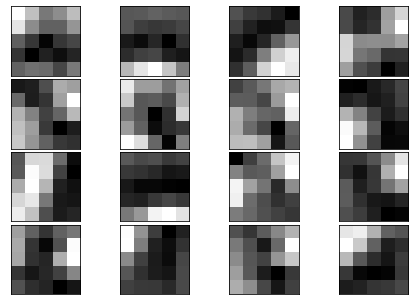

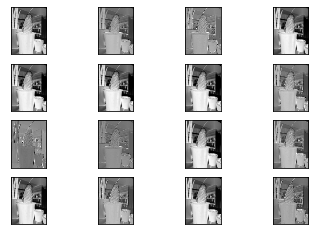

In [126]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet
from matplotlib.image import imread
from common.layers import Convolution

def filter_show(filters, nx=4, show_num=16):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(show_num / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(show_num):
        ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')


network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

# 학습된 가중치
network.load_params("params.pkl")

filter_show(network.params['W1'], 16)

img = imread('../dataset/cactus_gray.png')
print(img.shape)
img = img.reshape(1, 1, *img.shape)
print(img.shape)
fig = plt.figure()

w_idx = 1

print(network.params['W1'].shape)
for i in range(16):
    w = network.params['W1'][i]
    b = 0  # network.params['b1'][i]

    w = w.reshape(1, *w.shape)
    #b = b.reshape(1, *b.shape)
    conv_layer = Convolution(w, b) 
    out = conv_layer.forward(img)
    print(out.shape)
    out = out.reshape(out.shape[2], out.shape[3])
    
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(out, cmap=plt.cm.gray_r, interpolation='nearest')

plt.show()

In [50]:
import numpy as np
from simple_convnet import SimpleConvNet

network = SimpleConvNet(input_dim=(1,10, 10), 
                        conv_param = {'filter_num':10, 'filter_size':3, 'pad':0, 'stride':1},
                        hidden_size=10, output_size=10, weight_init_std=0.01)

X = np.random.rand(100).reshape((1, 1, 10, 10))
T = np.array([1]).reshape((1,1))

grad_num = network.numerical_gradient(X, T)
grad = network.gradient(X, T)

for key, val in grad_num.items():
    print(key, np.abs(grad_num[key] - grad[key]).mean())

W1 1.6378990491090084e-10
b1 3.014825766096095e-10
W2 2.3467965930724185e-11
b2 2.4334211910044187e-09
W3 1.4006283527829661e-10
b3 1.7991203938860777e-07


In [51]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    """단순한 합성곱 신경망
    
    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """기울기를 구한다（수치미분）.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

In [52]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)
print(x_train.shape)
print(t_train.shape)

(60000, 1, 28, 28)
(60000,)


train loss:2.2998737006631105
=== epoch:1, train acc:0.358, test acc:0.324 ===
train loss:2.2976514166732844
train loss:2.2923688805125293
train loss:2.285492377677886
train loss:2.2849321870160093
train loss:2.2723806637157287
train loss:2.2557604017930624
train loss:2.2421423630796893
train loss:2.21927779661687
train loss:2.207985261372832
train loss:2.1551042355122205
train loss:2.1422601384323756
train loss:2.1054305582582646
train loss:2.0232200239701608
train loss:2.0425837558664237
train loss:1.9410911959211605
train loss:1.92194718466572
train loss:1.7785698004334538
train loss:1.7566241405080583
train loss:1.6457766255821356
train loss:1.6132141443509789
train loss:1.4764267044673103
train loss:1.4870462946992362
train loss:1.3696221414853225
train loss:1.2803626165948616
train loss:1.2231137704249297
train loss:1.1633169768927965
train loss:0.9189587932976118
train loss:0.9771132393119877
train loss:0.9003038299985958
train loss:0.8268124190908732
train loss:0.66856066228515

train loss:0.18866646664295902
train loss:0.240802669054357
train loss:0.3290492745743387
train loss:0.21141685821501338
train loss:0.15357275369064743
train loss:0.19669999564898688
train loss:0.15111359641455177
train loss:0.26860154422022203
train loss:0.2279903318940035
train loss:0.251015363488283
train loss:0.11754877075436788
train loss:0.267916588981419
train loss:0.1374889745173383
train loss:0.09345102151229788
train loss:0.3064252821953897
train loss:0.12556301132422493
train loss:0.16276060949716706
train loss:0.09910623475790045
train loss:0.2514503255398633
train loss:0.1633951170259629
train loss:0.16051699799081856
train loss:0.11085932401432069
train loss:0.15026014955618838
train loss:0.16350612053375527
train loss:0.253158406372834
train loss:0.2044883978077322
train loss:0.15546413103817242
train loss:0.1455140700311248
train loss:0.16391712624100152
train loss:0.15383857685273689
train loss:0.20552013566847308
train loss:0.22184641153479273
train loss:0.15306931095

train loss:0.07661820876929047
train loss:0.06932639305268669
train loss:0.11286188939521381
train loss:0.08503581996343768
train loss:0.10210508346240277
train loss:0.039105649560003224
train loss:0.12732543893646198
train loss:0.036521320014539393
train loss:0.1540072744636436
train loss:0.0941381934646304
train loss:0.11922577976954951
train loss:0.060453650115341866
train loss:0.10011482989937483
train loss:0.03562862245260245
train loss:0.03149250929697971
train loss:0.11594544640941425
train loss:0.21644768797090982
train loss:0.049087819078968975
train loss:0.08968340702088227
train loss:0.058228441198936665
train loss:0.06400424720434707
train loss:0.10751421511037075
train loss:0.13221974874529846
train loss:0.04232411136411246
train loss:0.160937942022168
train loss:0.05283190101557775
train loss:0.11802121226517263
train loss:0.04720587495791176
train loss:0.09684914118259944
train loss:0.1327577263084227
train loss:0.10643110400786872
=== epoch:12, train acc:0.97, test acc:

train loss:0.08670510679402556
train loss:0.03154038362902849
train loss:0.017194063684891583
train loss:0.049234388154779804
train loss:0.05423750828003651
train loss:0.038025693384565615
train loss:0.06743509008592294
train loss:0.012603726907404895
train loss:0.011300408561933161
train loss:0.07153476453240588
train loss:0.045405009492240564
train loss:0.01993732570264688
train loss:0.03994411686937045
train loss:0.035600257510126174
train loss:0.04942748261655949
train loss:0.051273724515686556
train loss:0.0805524284330802
train loss:0.04841439815937904
train loss:0.030526608317940154
train loss:0.0403851795304542
train loss:0.07849084491913043
train loss:0.058703295485389904
train loss:0.01933856813025366
train loss:0.046015653116171784
train loss:0.0401097053855813
=== epoch:17, train acc:0.979, test acc:0.955 ===
train loss:0.035499925261074775
train loss:0.08350837257263517
train loss:0.017783401081806635
train loss:0.024277502767928713
train loss:0.018414957873871873
train lo

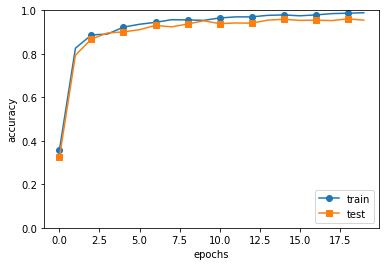

In [127]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)


# 시간이 오래 걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

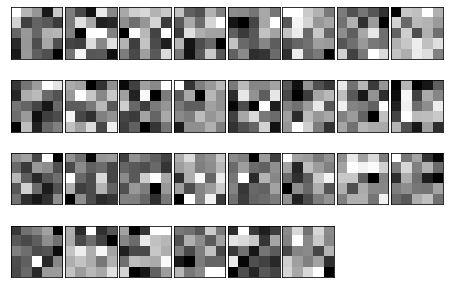

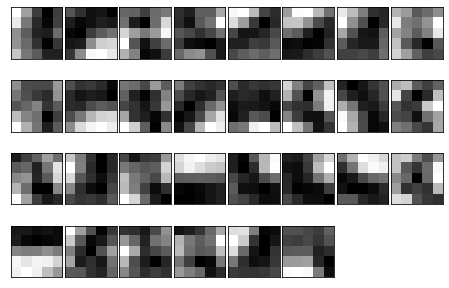

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])

# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])